In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("raw_data.csv")

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

### Drop Irrevelant columns

In [7]:
df = df.drop(labels=["ID","Delivery_person_ID","Order_Date","Type_of_order"],axis=1)

In [8]:
df.shape

(45584, 16)

In [9]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,scooter,1.0,No,Metropolitian,41


In [10]:
df["Time_order_hour"] = df["Time_Orderd"].str.split(":").str[0]
df["Time_order_min"] = df["Time_Orderd"].str.split(":").str[1]
df = df.drop(labels=["Time_Orderd"],axis=1)
df["Time_order_picked_hour"] = df["Time_Order_picked"].str.split(":").str[0]
df["Time_order_picked_min"] = df["Time_Order_picked"].str.split(":").str[1]
df = df.drop(labels=["Time_Order_picked"],axis=1)

In [11]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,14,55,15,05
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,17,30,17,40
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,09,20,09,30
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19,50,20,05


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_vehicle              45584 non-null  object 
 10  multiple_deliveries          44591 non-null  float64
 11  Festival                     45356 non-null  object 
 12  City                         44384 non-null  object 
 13  Time_taken (min)

### Handling Missing Values

In [13]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
Time_order_hour                1731
Time_order_min                 5799
Time_order_picked_hour            0
Time_order_picked_min          4127
dtype: int64

In [14]:
df["Time_order_hour"] = df["Time_order_hour"].astype(float)
df["Time_order_min"] = df["Time_order_min"].astype(float)
df["Time_order_picked_hour"] = df["Time_order_picked_hour"].astype(float)
df["Time_order_picked_min"] = df["Time_order_picked_min"].astype(float)

In [15]:
df1 = df.copy()

In [16]:
numerical_columns=df1.columns[df.dtypes!='object']
categorical_columns=df1.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_order_hour',
       'Time_order_min', 'Time_order_picked_hour', 'Time_order_picked_min'],
      dtype='object')
Categorical Columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')


In [17]:
df1.isna().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
Time_order_hour                1731
Time_order_min                 5799
Time_order_picked_hour            0
Time_order_picked_min          4127
dtype: int64

In [18]:
df2 = df1.fillna(value = df1.median())

C:\Users\shreyash12\AppData\Local\Temp\ipykernel_9184\3605891681.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df1.fillna(value = df1.median())


In [19]:
df2

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,32,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,36,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,16,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,26,13.0,35.0,13.0,40.0


In [20]:
df2.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                        228
City                           1200
Time_taken (min)                  0
Time_order_hour                   0
Time_order_min                    0
Time_order_picked_hour            0
Time_order_picked_min             0
dtype: int64

In [21]:
df2

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,32,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,36,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,16,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,26,13.0,35.0,13.0,40.0


In [22]:
df1 = df1[categorical_columns]

In [23]:
df1

,Weather_conditions,Road_traffic_density,Type_of_vehicle,Festival,City
0,Fog,Jam,motorcycle,No,Metropolitian
1,Stormy,High,motorcycle,No,Metropolitian
2,Sandstorms,Medium,scooter,No,Metropolitian
3,Sandstorms,Low,motorcycle,No,Metropolitian
4,Fog,Jam,scooter,No,Metropolitian
...,...,...,...,...,...
45579,Windy,High,motorcycle,No,Metropolitian
45580,Windy,Jam,motorcycle,No,Metropolitian
45581,Cloudy,Low,scooter,No,Metropolitian
45582,Cloudy,High,motorcycle,No,Metropolitian


In [24]:
df1["Weather_conditions"].value_counts(normalize = True)*100

Fog           17.018769
Stormy        16.865326
Cloudy        16.751912
Sandstorms    16.665184
Windy         16.505070
Sunny         16.193738
Name: Weather_conditions, dtype: float64

In [25]:
for i in df1:
    s = df1[i].value_counts(normalize = True)*100
    print(s,"/n")
    print("#"*50)

    
    
        

Fog           17.018769
Stormy        16.865326
Cloudy        16.751912
Sandstorms    16.665184
Windy         16.505070
Sunny         16.193738
Name: Weather_conditions, dtype: float64 /n
##################################################
Low       34.404108
Jam       31.431874
Medium    24.331414
High       9.832603
Name: Road_traffic_density, dtype: float64 /n
##################################################
motorcycle          57.978677
scooter             33.505177
electric_scooter     8.366971
bicycle              0.149175
Name: Type_of_vehicle, dtype: float64 /n
##################################################
No     98.024517
Yes     1.975483
Name: Festival, dtype: float64 /n
##################################################
Metropolitian    76.800198
Urban            22.830299
Semi-Urban        0.369503
Name: City, dtype: float64 /n
##################################################


In [26]:
df1.isnull().sum()

Weather_conditions       616
Road_traffic_density     601
Type_of_vehicle            0
Festival                 228
City                    1200
dtype: int64

In [27]:
df1.head()

,Weather_conditions,Road_traffic_density,Type_of_vehicle,Festival,City
0,Fog,Jam,motorcycle,No,Metropolitian
1,Stormy,High,motorcycle,No,Metropolitian
2,Sandstorms,Medium,scooter,No,Metropolitian
3,Sandstorms,Low,motorcycle,No,Metropolitian
4,Fog,Jam,scooter,No,Metropolitian


In [28]:
df2["Weather_conditions"] = df1["Weather_conditions"].fillna(method = 'ffill')
df2["Road_traffic_density"] = df1["Road_traffic_density"].fillna(value = 'Medium')
df2["Festival"] = df1["Festival"].fillna(value = 'No')
df2["City"] = df1["City"].fillna(value = 'Semi-Urban')

In [29]:
df2.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
Time_order_hour                0
Time_order_min                 0
Time_order_picked_hour         0
Time_order_picked_min          0
dtype: int64

### Numerical Data Analysis

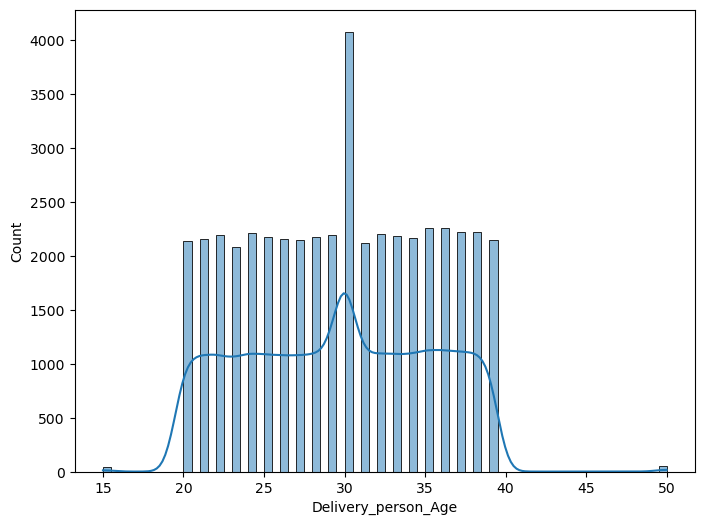

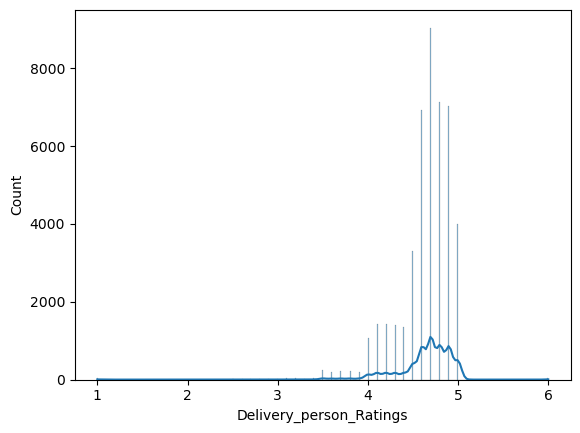

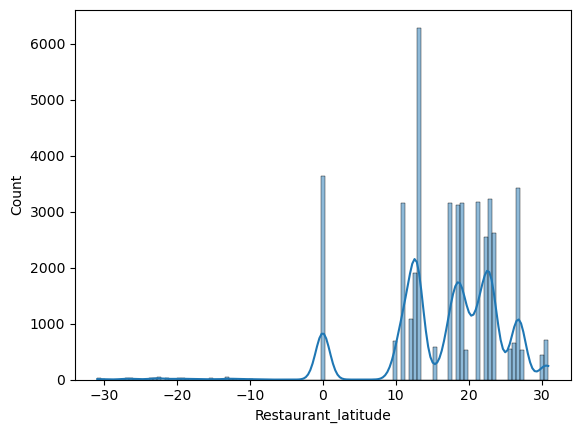

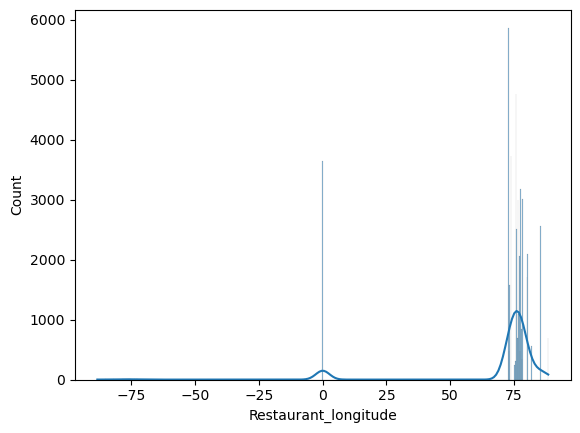

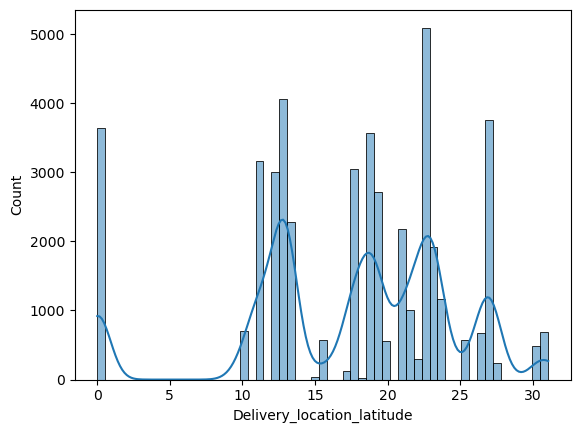

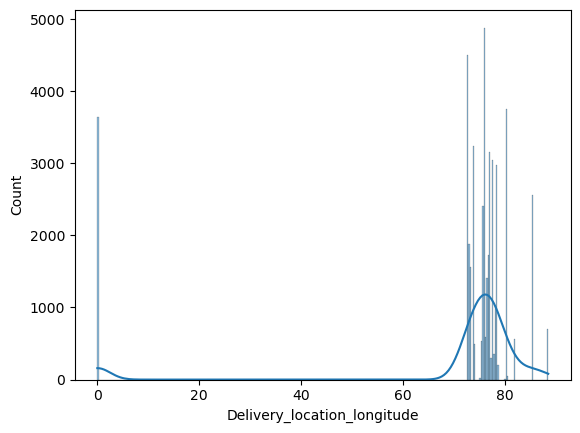

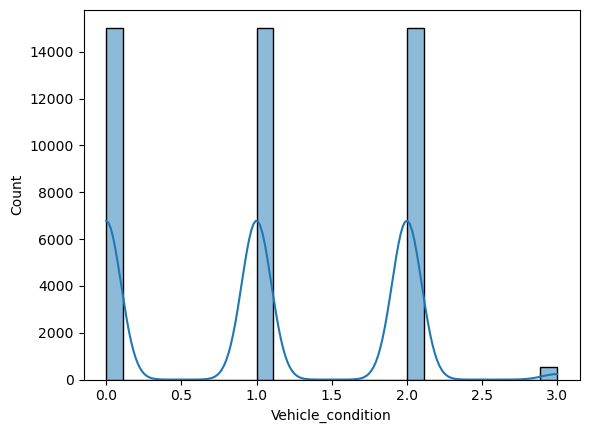

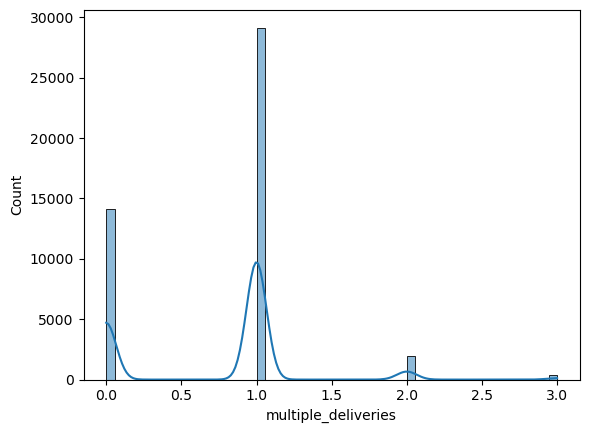

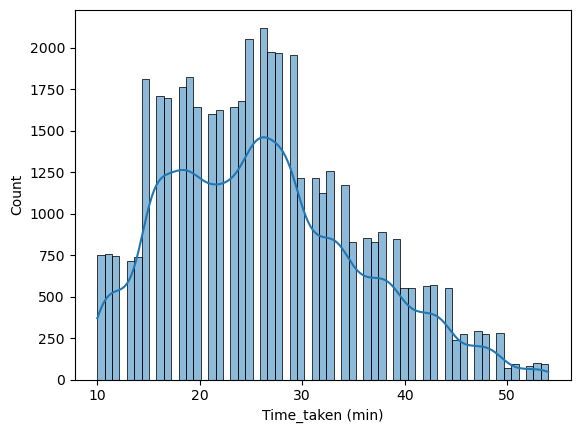

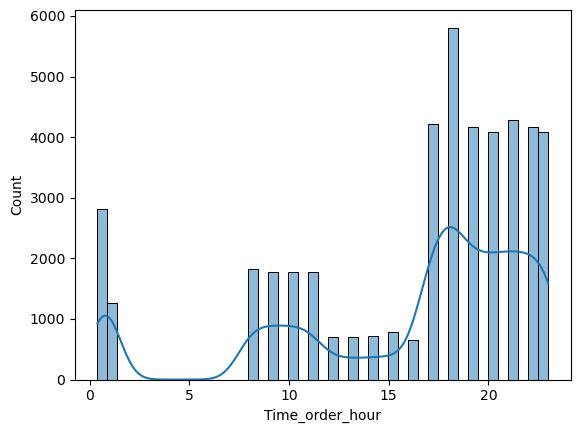

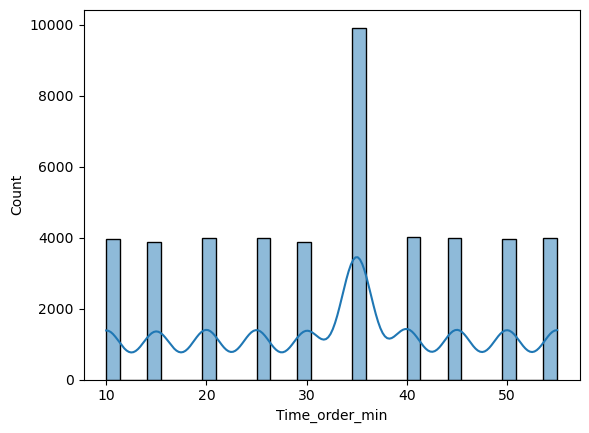

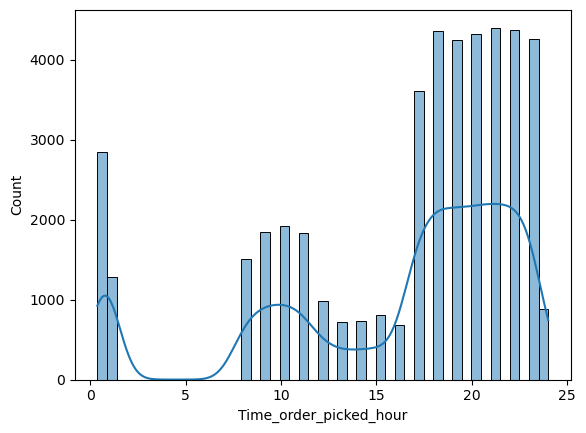

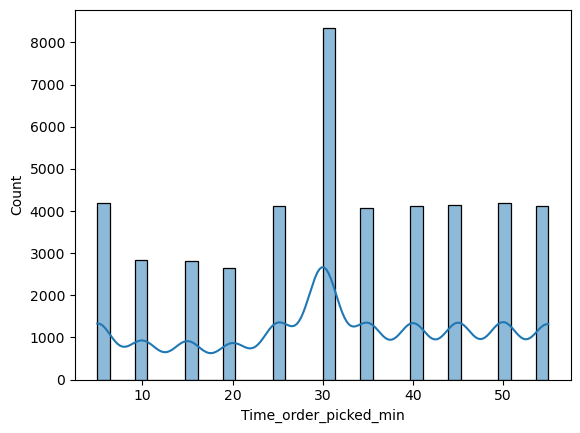

In [30]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df2,x=i,kde=True)
    print('\n')
    plt.show()

In [31]:
### Categorical Data Analysis


### Categorical Data Analysis

****************************************************************************************************


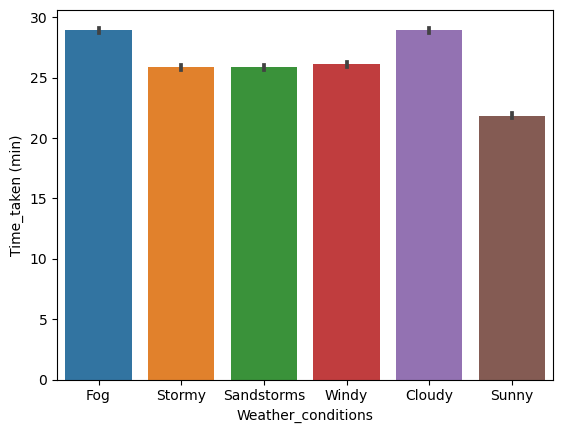

****************************************************************************************************


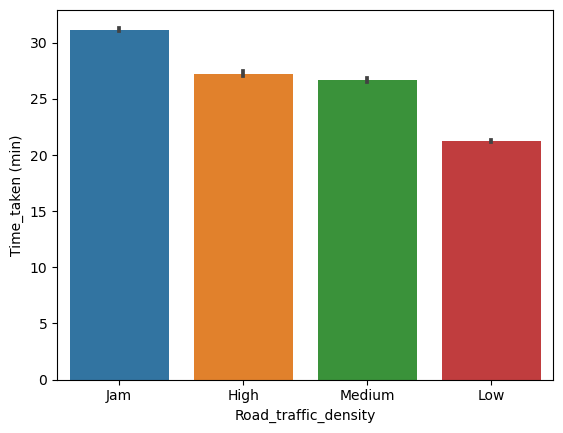

****************************************************************************************************


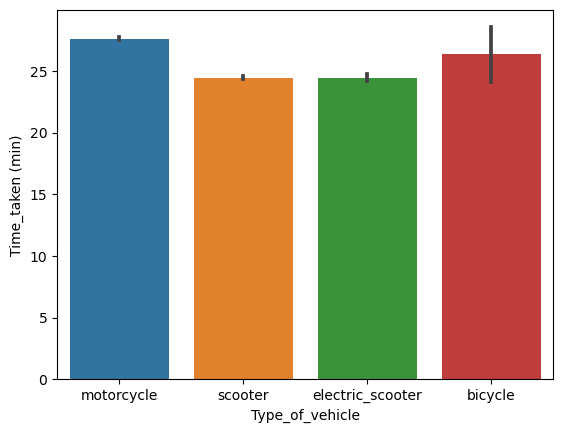

****************************************************************************************************


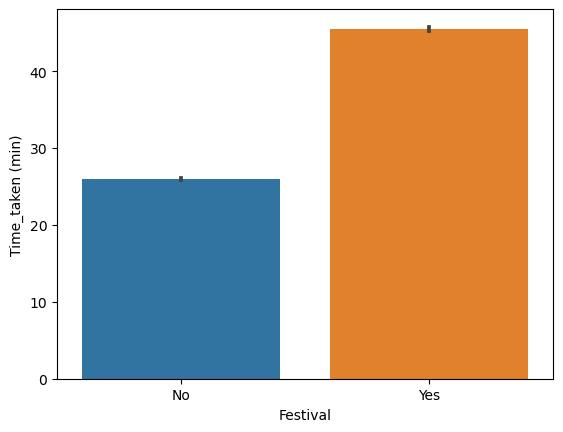

****************************************************************************************************


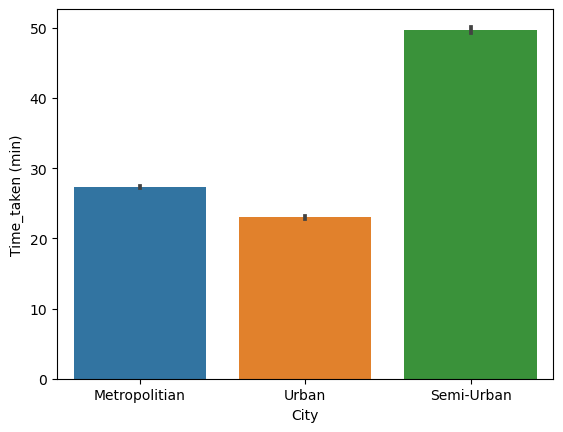

In [32]:
x = 0
for i in categorical_columns:
    sns.barplot(data=df1,x=i,y=df["Time_taken (min)"])
    print("*"*100)
    plt.show()

In [33]:
df1

,Weather_conditions,Road_traffic_density,Type_of_vehicle,Festival,City
0,Fog,Jam,motorcycle,No,Metropolitian
1,Stormy,High,motorcycle,No,Metropolitian
2,Sandstorms,Medium,scooter,No,Metropolitian
3,Sandstorms,Low,motorcycle,No,Metropolitian
4,Fog,Jam,scooter,No,Metropolitian
...,...,...,...,...,...
45579,Windy,High,motorcycle,No,Metropolitian
45580,Windy,Jam,motorcycle,No,Metropolitian
45581,Cloudy,Low,scooter,No,Metropolitian
45582,Cloudy,High,motorcycle,No,Metropolitian


In [34]:
df2 

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,32,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,36,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,16,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,26,13.0,35.0,13.0,40.0


In [35]:
x = df2.drop(labels=["Time_taken (min)"],axis=1)
y = df2[["Time_taken (min)"]]
df2 = x

In [36]:
df2['Time_taken (min)'] = y

In [37]:
df2.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_order_hour',
       'Time_order_min', 'Time_order_picked_hour', 'Time_order_picked_min',
       'Time_taken (min)'],
      dtype='object')

In [38]:
df2 = pd.DataFrame(df2)

In [39]:
df2.to_csv("clean_data.csv")

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45584 non-null  float64
 1   Delivery_person_Ratings      45584 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           45584 non-null  object 
 7   Road_traffic_density         45584 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_vehicle              45584 non-null  object 
 10  multiple_deliveries          45584 non-null  float64
 11  Festival                     45584 non-null  object 
 12  City                         45584 non-null  object 
 13  Time_order_hour 

In [41]:
df2['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [42]:
df['Vehicle_condition'].unique()

array([2, 1, 0, 3], dtype=int64)

In [43]:
df2

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,11.0,35.0,11.0,45.0,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,19.0,55.0,20.0,10.0,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,23.0,50.0,24.0,5.0,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,13.0,35.0,13.0,40.0,26
